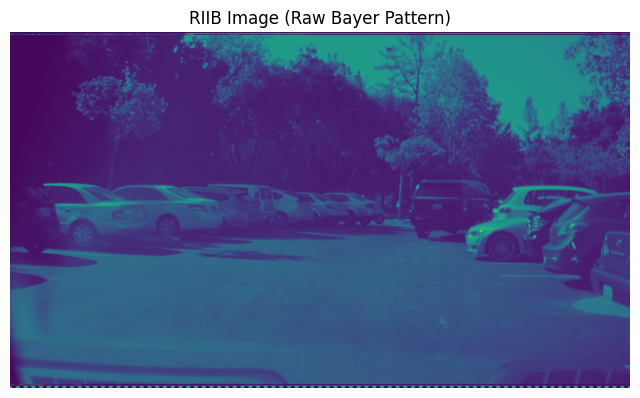

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the RIIB image (replace 'your_image.riib' with the actual filename)
image_path = "/content/23646.pgm"

# Read the raw image as a grayscale array
raw_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Check if the image is loaded
if raw_image is None:
    print("Error: Unable to load the RIIB image. Check the file path and format.")
else:
    # Display the raw image
    plt.figure(figsize=(8, 8))
    plt.imshow(raw_image)  # Assuming it's grayscale raw Bayer
    plt.title("RIIB Image (Raw Bayer Pattern)")
    plt.axis("off")
    plt.show()


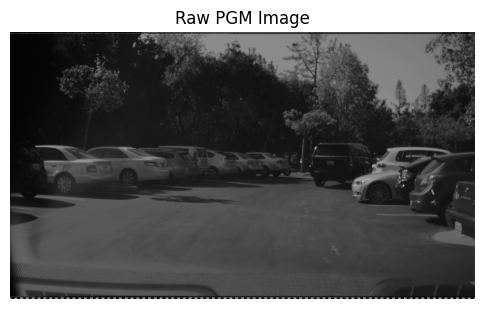

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Path to your image
image_path = "/content/23646.pgm"

# Load the image in raw format (grayscale)
raw_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Check if the image is loaded properly
if raw_image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    # Display the raw image
    plt.figure(figsize=(6, 6))
    plt.imshow(raw_image, cmap='gray')  # Display as grayscale
    plt.title("Raw PGM Image")
    plt.axis("off")
    plt.show()


Annotation mapping with RGB png images

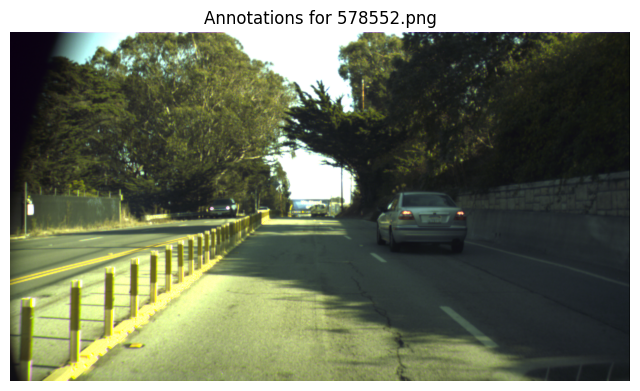

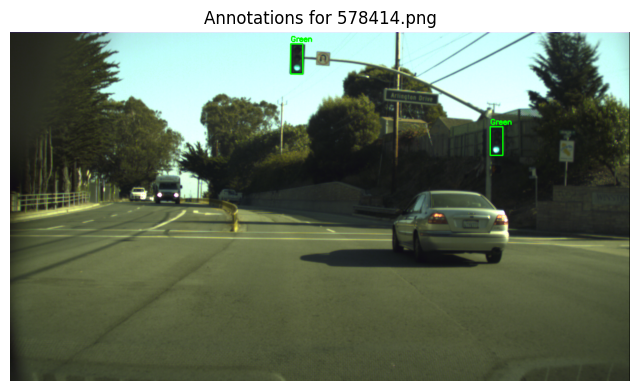

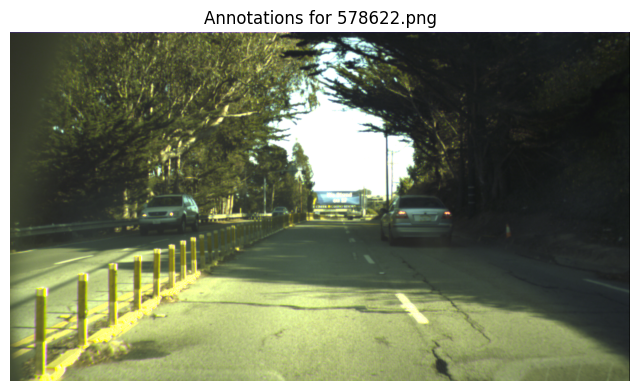

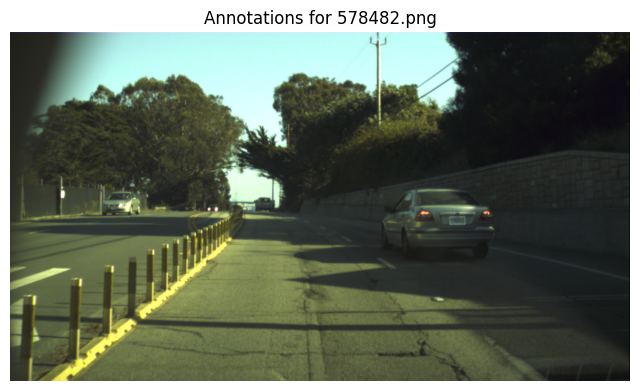

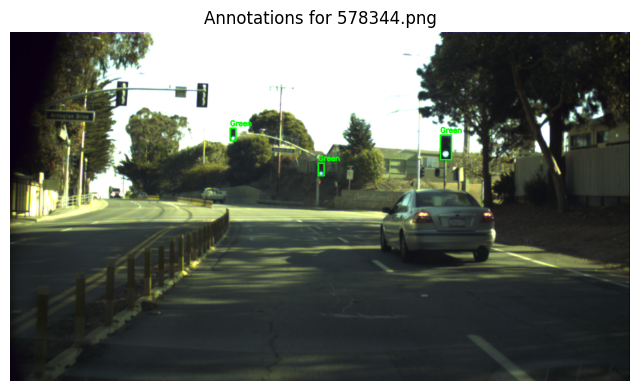

✅ Annotation process completed!


In [ ]:
import cv2
import yaml
import os
import glob
import matplotlib.pyplot as plt

# Set paths
yaml_path = "/content/train.yaml"  # Update if different
images_folder = "/content/images/"  # Folder containing uploaded images

# Load YAML annotations
with open(yaml_path, "r") as file:
    annotations = yaml.safe_load(file)

# Get all PNG image paths in the folder
image_files = glob.glob(os.path.join(images_folder, "*.png"))

# Define colors for different labels
color_map = {
    "Red": (0, 0, 255),                 # Red
    "RedLeft": (0, 50, 255),             # Slightly different Red for Left-turn
    "RedRight": (0, 100, 255),           # Another shade of Red for Right-turn
    "RedStraight": (0, 150, 255),        # Different Red for going straight
    "RedStraightLeft": (0, 200, 255),    # Red for straight & left

    "Yellow": (0, 255, 255),             # Yellow

    "Green": (0, 255, 0),                # Green
    "GreenLeft": (50, 255, 50),          # Green for Left-turn
    "GreenRight": (100, 255, 100),       # Green for Right-turn
    "GreenStraight": (150, 255, 150),    # Green for going straight
    "GreenStraightLeft": (200, 255, 200),# Green for straight & left
    "GreenStraightRight": (255, 255, 150),# Green for straight & right

    "off": (100, 100, 100)               # Gray for off/no signal
}

# Process each image in the folder
for image_path in image_files:
    image_name = os.path.basename(image_path)  # Get filename (e.g., '23646.png')

    # Find the corresponding annotation in train.yaml
    target_entry = None
    for entry in annotations:
        if image_name in entry["path"]:  # Match exact filename
            target_entry = entry
            break

    if target_entry is None:
        print(f"⚠ No annotation found for {image_name}, skipping.")
        continue

    # Get bounding boxes
    bboxes = target_entry["boxes"]

    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Error: Unable to load image {image_path}")
        continue

    # Draw bounding boxes
    for bbox in bboxes:
        label = bbox["label"]
        x_min, y_min, x_max, y_max = int(bbox["x_min"]), int(bbox["y_min"]), int(bbox["x_max"]), int(bbox["y_max"])

        color = color_map.get(label, (0, 255, 0))  # Default: Green if unknown label

        # Draw rectangle
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)

        # Put label text
        cv2.putText(image, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Convert BGR to RGB for Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the annotated image
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title(f"Annotations for {image_name}")
    plt.axis("off")
    plt.show()

    # Save annotated image (optional)
    save_path = os.path.join("/content/annotated_images", image_name)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    cv2.imwrite(save_path, image)

print("✅ Annotation process completed!")


## Tring if i can map the png annotations with pgm type since annotations for pgm format is not available

## Problem is the images are not in 8 bit format (pixel value between 0 - 255) instead are in 12bit which have more than 4k value
(mathplotlib cant handle them)


# normalisation to convert them into 8 bit and then displaying

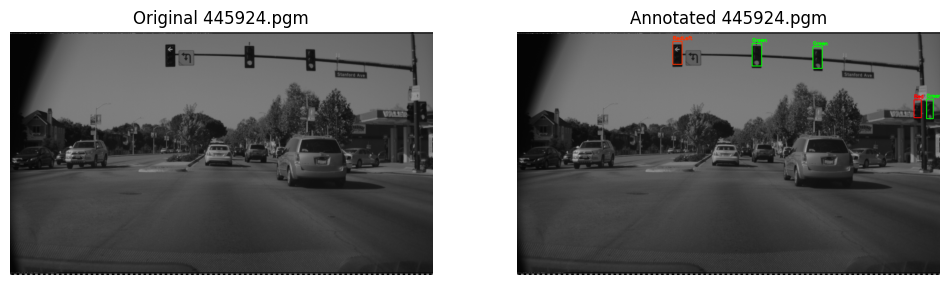

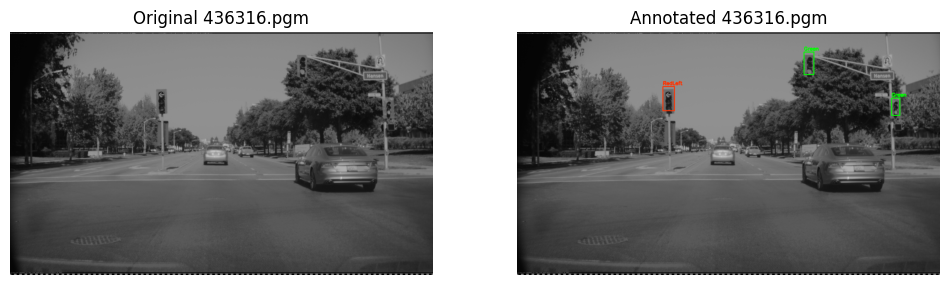

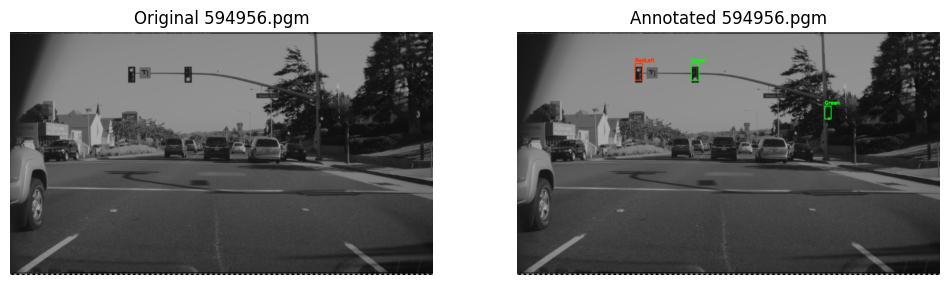

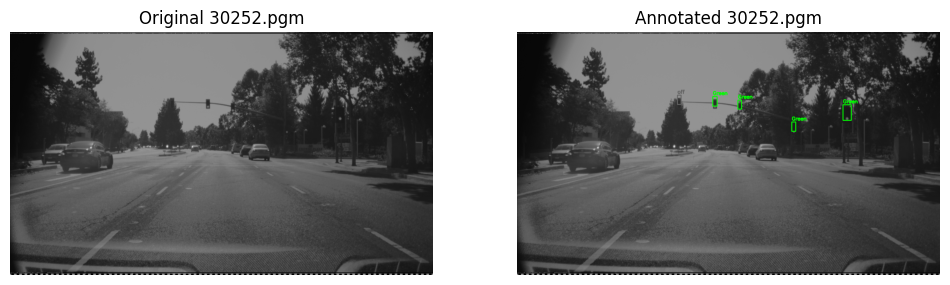

✅ Annotation mapping process completed!


In [3]:
import cv2
import yaml
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

# Set paths
yaml_path = "/content/train.yaml"  # Path to annotations
png_folder = "/content/images/"  # Folder containing PNG images
pgm_folder = "/content/img/"  # Folder where you uploaded PGM images

# Load YAML annotations
with open(yaml_path, "r") as file:
    annotations = yaml.safe_load(file)

# Get all PNG image names (without extensions)
png_files = {os.path.splitext(os.path.basename(f))[0]: f for f in glob.glob(os.path.join(png_folder, "*.png"))}

# Get all PGM image names (without extensions) from `img/`
pgm_files = {os.path.splitext(os.path.basename(f))[0]: f for f in glob.glob(os.path.join(pgm_folder, "*.pgm"))}

# Define colors for different labels
color_map = {
    "Red": (0, 0, 255),                 # Red
    "RedLeft": (0, 50, 255),             # Slightly different Red for Left-turn
    "RedRight": (0, 100, 255),           # Another shade of Red for Right-turn
    "RedStraight": (0, 150, 255),        # Different Red for going straight
    "RedStraightLeft": (0, 200, 255),    # Red for straight & left

    "Yellow": (0, 255, 255),             # Yellow

    "Green": (0, 255, 0),                # Green
    "GreenLeft": (50, 255, 50),          # Green for Left-turn
    "GreenRight": (100, 255, 100),       # Green for Right-turn
    "GreenStraight": (150, 255, 150),    # Green for going straight
    "GreenStraightLeft": (200, 255, 200),# Green for straight & left
    "GreenStraightRight": (255, 255, 150),# Green for straight & right

    "off": (100, 100, 100)               # Gray for off/no signal
}

# Process each PNG image and map annotations to its PGM counterpart
for name in png_files:
    if name in pgm_files:  # Check if a corresponding PGM file exists in `img/`
        png_path = png_files[name]
        pgm_path = pgm_files[name]  # Matching PGM file in `img/`

        # Find the corresponding annotation in `train.yaml`
        target_entry = None
        for entry in annotations:
            if os.path.basename(png_path) in entry["path"]:  # Match PNG filename
                target_entry = entry
                break

        if target_entry is None:
            print(f"⚠ No annotation found for {png_path}, skipping.")
            continue

        # Load the PGM image
        pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)

        if pgm_image is None:
            print(f"❌ Error: Unable to load PGM image {pgm_path}")
            continue

        # Normalize brightness if image appears too bright
        pgm_image_normalized = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX)
        pgm_image_normalized = np.uint8(pgm_image_normalized)

        # Convert grayscale PGM to BGR (so we can draw colored boxes)
        annotated_pgm = cv2.cvtColor(pgm_image_normalized, cv2.COLOR_GRAY2BGR)

        # Get bounding boxes
        bboxes = target_entry["boxes"]

        # Draw bounding boxes on the annotated image
        for bbox in bboxes:
            label = bbox["label"]
            x_min, y_min, x_max, y_max = int(bbox["x_min"]), int(bbox["y_min"]), int(bbox["x_max"]), int(bbox["y_max"])

            color = color_map.get(label, (0, 255, 0))  # Default: Green if unknown label

            # Draw rectangle
            cv2.rectangle(annotated_pgm, (x_min, y_min), (x_max, y_max), color, 2)

            # Put label text
            cv2.putText(annotated_pgm, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Convert images to RGB for Matplotlib visualization
        original_rgb = cv2.cvtColor(pgm_image_normalized, cv2.COLOR_GRAY2RGB)
        annotated_rgb = cv2.cvtColor(annotated_pgm, cv2.COLOR_BGR2RGB)

        # Display side-by-side comparison
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(original_rgb)
        plt.title(f"Original {name}.pgm")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(annotated_rgb)
        plt.title(f"Annotated {name}.pgm")
        plt.axis("off")

        plt.show()

        # Save annotated PGM image (optional)
        save_path = os.path.join("/content/annotated_pgm_images", f"{name}.pgm")
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        cv2.imwrite(save_path, annotated_pgm)

print("✅ Annotation mapping process completed!")


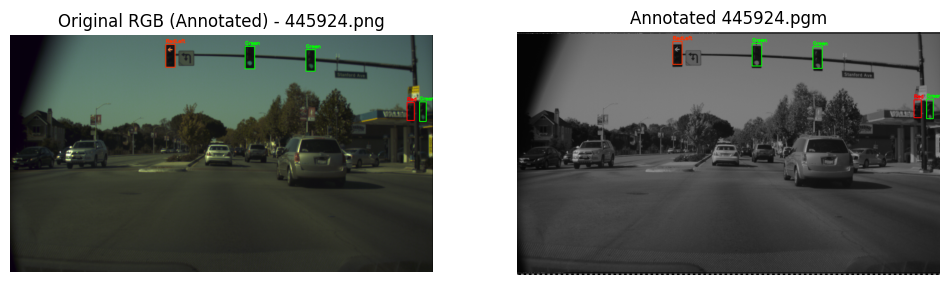

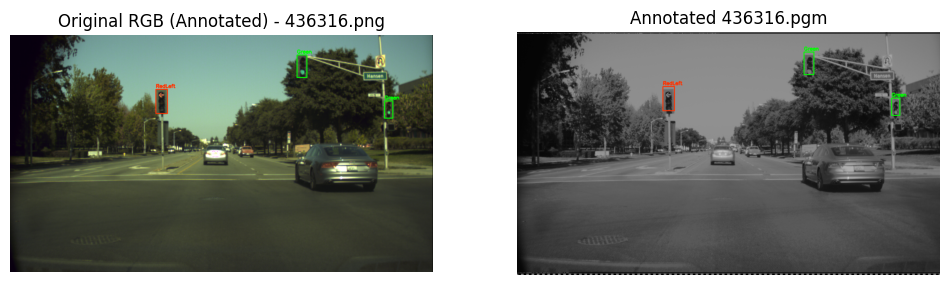

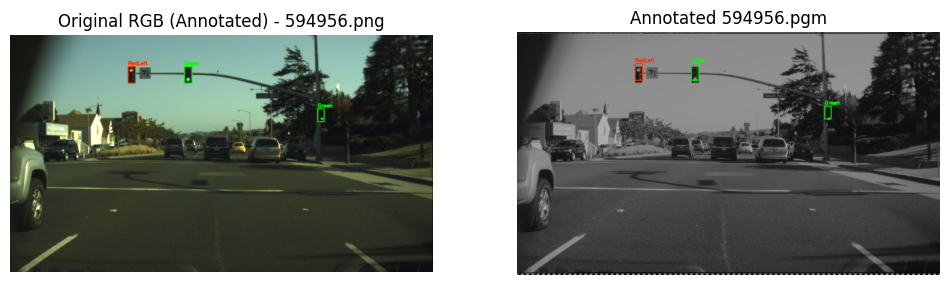

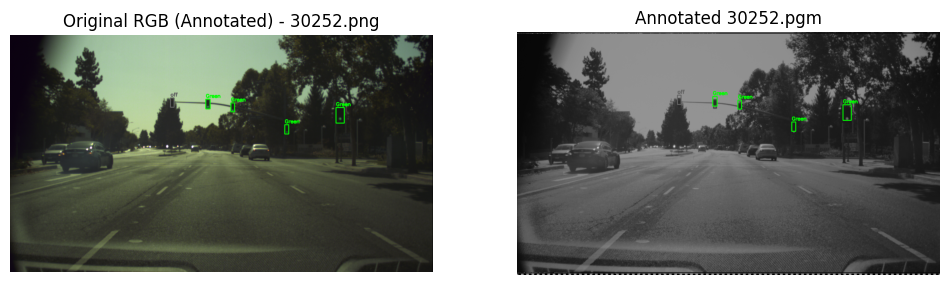

In [6]:
# Process each PNG image and map annotations to its PGM counterpart
for name in png_files:
    if name in pgm_files:  # Check if a corresponding PGM file exists in `img/`
        png_path = png_files[name]
        pgm_path = pgm_files[name]  # Matching PGM file in `img/`

        # Find the corresponding annotation in `train.yaml`
        target_entry = None
        for entry in annotations:
            if os.path.basename(png_path) in entry["path"]:  # Match PNG filename
                target_entry = entry
                break

        if target_entry is None:
            print(f"⚠ No annotation found for {png_path}, skipping.")
            continue

        # Load the PNG image (original RGB)
        png_image = cv2.imread(png_path)
        if png_image is None:
            print(f"❌ Error: Unable to load PNG image {png_path}")
            continue
        png_image = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Load the PGM image
        pgm_image = cv2.imread(pgm_path, cv2.IMREAD_UNCHANGED)
        if pgm_image is None:
            print(f"❌ Error: Unable to load PGM image {pgm_path}")
            continue

        # Normalize brightness if needed
        pgm_image_normalized = cv2.normalize(pgm_image, None, 0, 255, cv2.NORM_MINMAX)
        pgm_image_normalized = np.uint8(pgm_image_normalized)

        # Convert grayscale PGM to RGB (ensuring color consistency)
        annotated_pgm = cv2.cvtColor(pgm_image_normalized, cv2.COLOR_GRAY2RGB)

        # Get bounding boxes
        bboxes = target_entry["boxes"]

        # Draw bounding boxes with consistent colors
        for bbox in bboxes:
            label = bbox["label"]
            x_min, y_min, x_max, y_max = int(bbox["x_min"]), int(bbox["y_min"]), int(bbox["x_max"]), int(bbox["y_max"])

            # Convert BGR to RGB for consistent display
            color_bgr = color_map.get(label, (0, 255, 0))  # Default: Green
            color_rgb = (color_bgr[2], color_bgr[1], color_bgr[0])  # Convert BGR → RGB

            # Draw rectangle on PNG image
            cv2.rectangle(png_image, (x_min, y_min), (x_max, y_max), color_rgb, 2)
            cv2.putText(png_image, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color_rgb, 2)

            # Draw rectangle on PGM image
            cv2.rectangle(annotated_pgm, (x_min, y_min), (x_max, y_max), color_rgb, 2)
            cv2.putText(annotated_pgm, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color_rgb, 2)

        # Display both images side by side with consistent colors
        plt.figure(figsize=(12, 6))

        # Original PNG with annotations
        plt.subplot(1, 2, 1)
        plt.imshow(png_image)
        plt.title(f"Original RGB (Annotated) - {name}.png")
        plt.axis("off")

        # Annotated PGM image
        plt.subplot(1, 2, 2)
        plt.imshow(annotated_pgm)
        plt.title(f"Annotated {name}.pgm")
        plt.axis("off")

        plt.show()
